# Homework 3 - Sample Solution

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,export_graphviz 
from sklearn.model_selection import train_test_split, cross_val_score
from statsmodels.discrete.discrete_model import Logit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, roc_auc_score, roc_curve, accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv("Employee_attrition.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


<h1 style="text-align:center"> Problem 1 </h1>

**Answer 1.1:** *No column has missing values (sample solutions provided In[3], In[4], In[5])*

**Answer 1.2:** *The following columns seems to have outliers: Monthly Income, NumCompaniesWorked, StockOptionLevel,TotalWorkingYears, TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager (sample solutions provided In[9]). PerformanceRating looks suspicious, probably it has 2 values only, we should check frequency of each value as done In[10].*

In [3]:
# to manually look for True values
data.isna().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [4]:
#to manually check whether there is a column with values <1470
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [5]:
#to sum up True values, i.e. to see how many columns have NAs
sum(data.isna().any())

0

In [6]:
#checking for 0 variance
data.var().round(2)

Age                               83.46
DailyRate                     162819.59
DistanceFromHome                  65.72
Education                          1.05
EmployeeCount                      0.00
EmployeeNumber                362433.30
EnvironmentSatisfaction            1.19
HourlyRate                       413.29
JobInvolvement                     0.51
JobLevel                           1.23
JobSatisfaction                    1.22
MonthlyIncome               22164857.07
MonthlyRate                 50662878.17
NumCompaniesWorked                 6.24
PercentSalaryHike                 13.40
PerformanceRating                  0.13
RelationshipSatisfaction           1.17
StandardHours                      0.00
StockOptionLevel                   0.73
TotalWorkingYears                 60.54
TrainingTimesLastYear              1.66
WorkLifeBalance                    0.50
YearsAtCompany                    37.53
YearsInCurrentRole                13.13
YearsSinceLastPromotion           10.38


In [7]:
#we'll drop EmployeeCount and StandardHours as the variance is 0
#we'll drop EmployeeNumber as it doesn't express any meaningful information
data.drop(["EmployeeCount","EmployeeNumber", "StandardHours"],axis=1,inplace=True)

In [8]:
#separate numerics for plotting the Boxplots
data_numeric=data.select_dtypes(exclude="object")
data_object=data.select_dtypes(include="object")

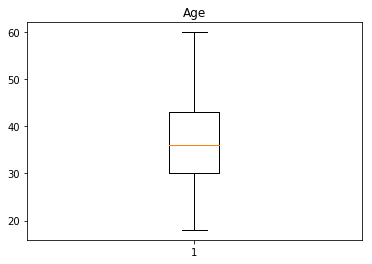

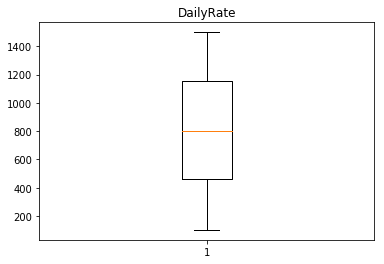

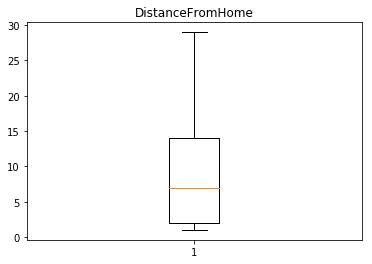

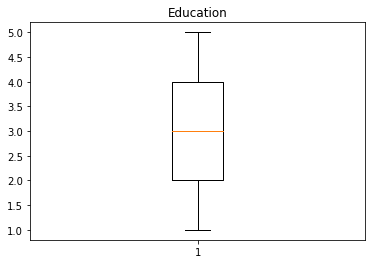

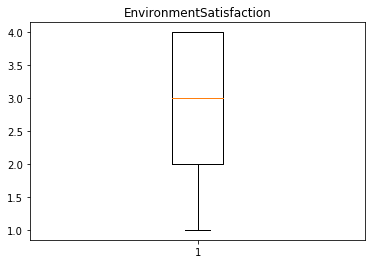

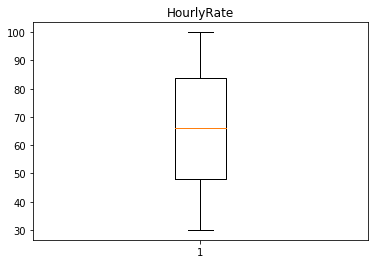

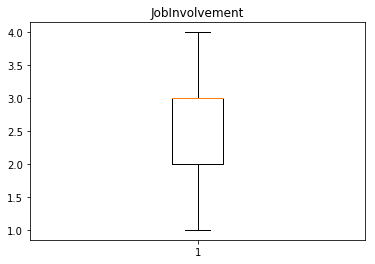

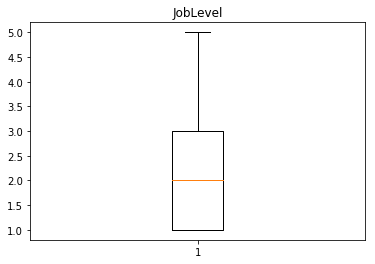

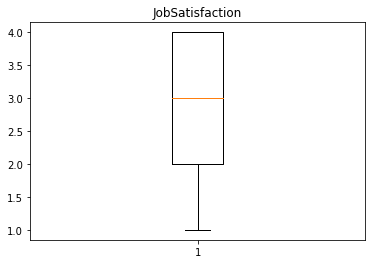

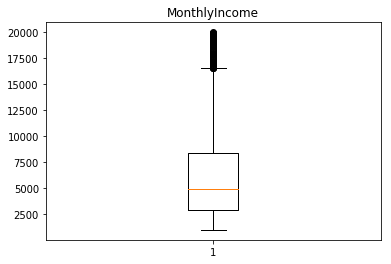

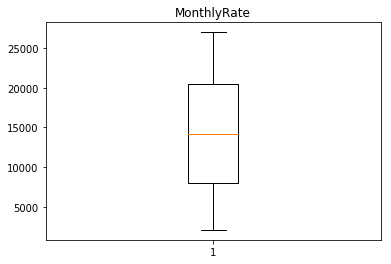

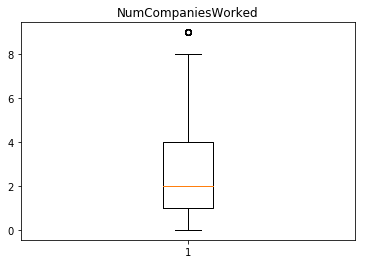

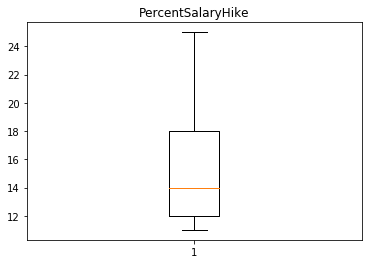

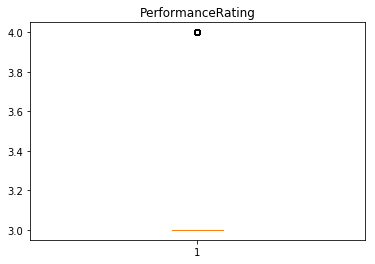

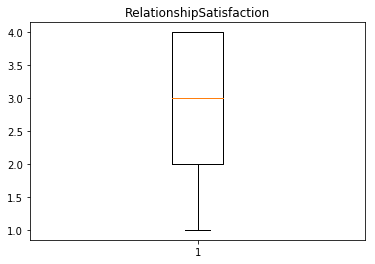

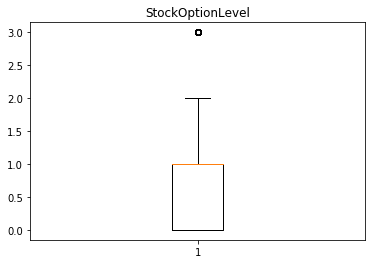

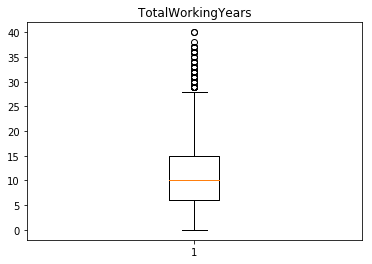

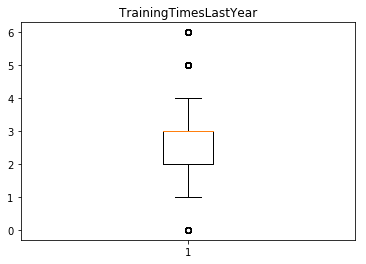

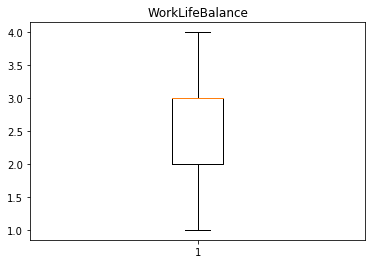

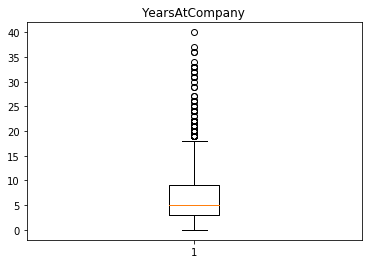

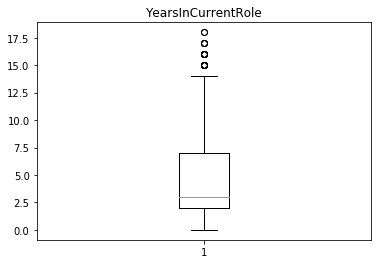

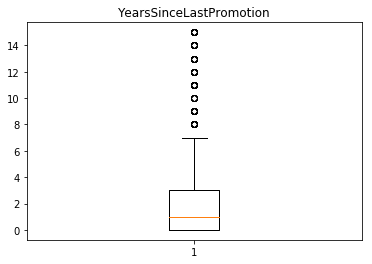

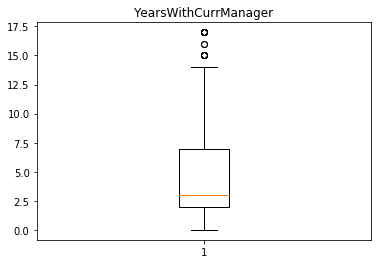

In [9]:
# plot the boxplots
for i in data_numeric.columns:
  plt.boxplot(data[i])
  plt.title(i)
  plt.show()

In [10]:
# As can be seen about 15% of employees had Performance Rating of 4. So, I'll keep all values of PerformanceRating variable.
data_numeric.PerformanceRating.value_counts() 

3    1244
4     226
Name: PerformanceRating, dtype: int64

In [11]:
#let's see unique values of objects
#As we see variable "Over18" has only 1 category which means we should remove it. 
for i in data_object.columns:
    print(data[i].value_counts())
    print("\n","*********************")

No     1233
Yes     237
Name: Attrition, dtype: int64

 *********************
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

 *********************
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

 *********************
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

 *********************
Male      882
Female    588
Name: Gender, dtype: int64

 *********************
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

 *********************
Married  

In [12]:
data_object.drop("Over18",axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [13]:
#let's create dummy variables
data_dummy=pd.get_dummies(data_object,drop_first=True,prefix=data_object.columns)
data_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 22 columns):
Attrition_Yes                        1470 non-null uint8
BusinessTravel_Travel_Frequently     1470 non-null uint8
BusinessTravel_Travel_Rarely         1470 non-null uint8
Department_Research & Development    1470 non-null uint8
Department_Sales                     1470 non-null uint8
EducationField_Life Sciences         1470 non-null uint8
EducationField_Marketing             1470 non-null uint8
EducationField_Medical               1470 non-null uint8
EducationField_Other                 1470 non-null uint8
EducationField_Technical Degree      1470 non-null uint8
Gender_Male                          1470 non-null uint8
JobRole_Human Resources              1470 non-null uint8
JobRole_Laboratory Technician        1470 non-null uint8
JobRole_Manager                      1470 non-null uint8
JobRole_Manufacturing Director       1470 non-null uint8
JobRole_Research Director            1

In [15]:
#As there are spaces in some variable names, let's remove spaces and join back sub datas 
data_dummy.columns=data_dummy.columns.str.replace(' ','').str.replace("&","")
data_final=data_dummy.join(data_numeric)
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 45 columns):
Attrition_Yes                       1470 non-null uint8
BusinessTravel_Travel_Frequently    1470 non-null uint8
BusinessTravel_Travel_Rarely        1470 non-null uint8
Department_ResearchDevelopment      1470 non-null uint8
Department_Sales                    1470 non-null uint8
EducationField_LifeSciences         1470 non-null uint8
EducationField_Marketing            1470 non-null uint8
EducationField_Medical              1470 non-null uint8
EducationField_Other                1470 non-null uint8
EducationField_TechnicalDegree      1470 non-null uint8
Gender_Male                         1470 non-null uint8
JobRole_HumanResources              1470 non-null uint8
JobRole_LaboratoryTechnician        1470 non-null uint8
JobRole_Manager                     1470 non-null uint8
JobRole_ManufacturingDirector       1470 non-null uint8
JobRole_ResearchDirector            1470 non-null uin

# Problem 2



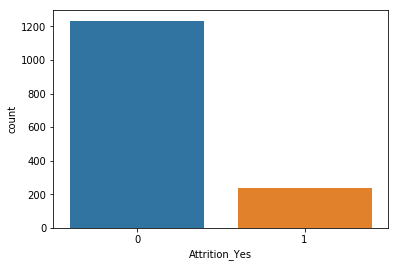

0    83.88
1    16.12
Name: Attrition_Yes, dtype: float64


In [64]:
#As "Attrition_Yes" is the dependent variable, let's look at value counts of 1 and 0
#We se that we have quite unbalanced data.
sns.countplot(data_final.Attrition_Yes)
plt.show()
print((data_final.Attrition_Yes.value_counts()/len(data_final)*100).round(2))

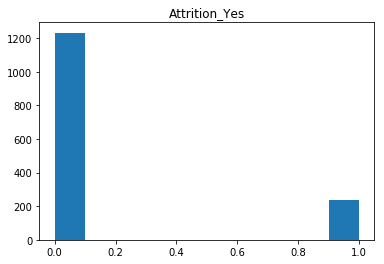

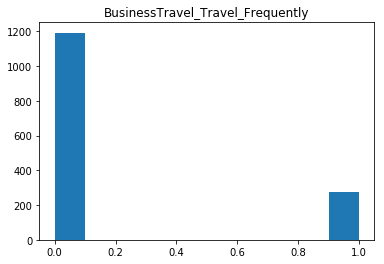

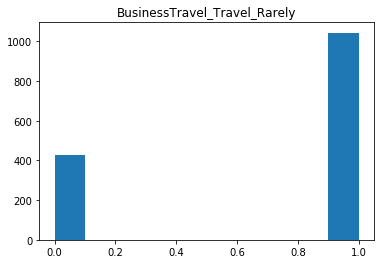

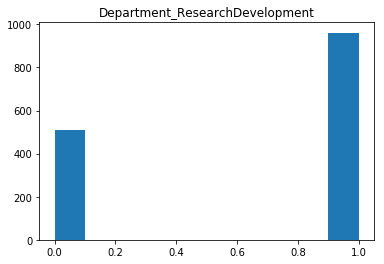

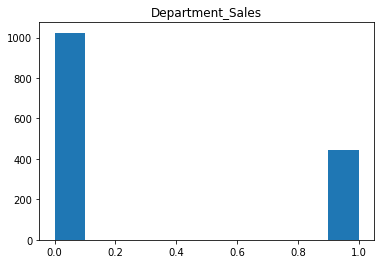

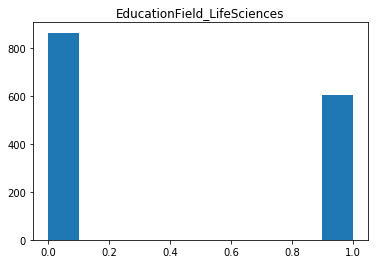

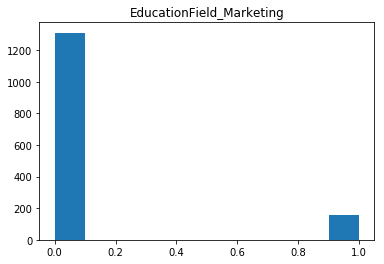

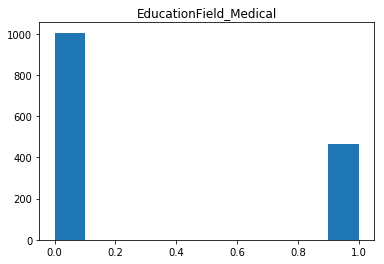

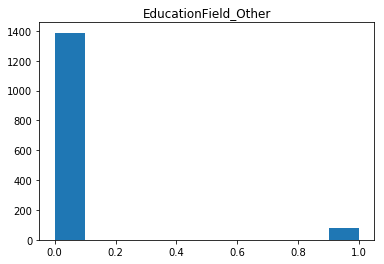

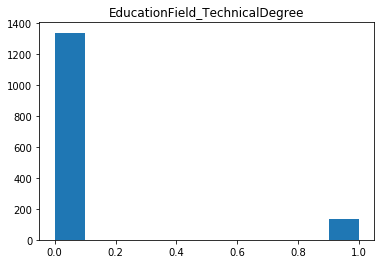

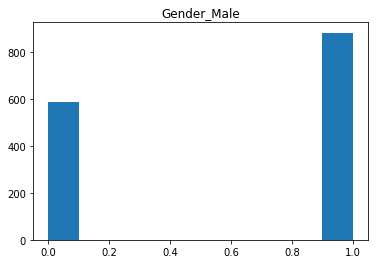

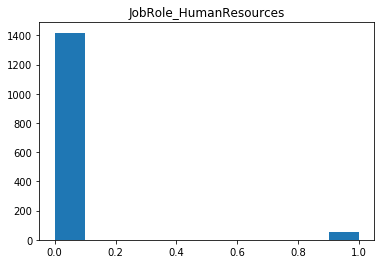

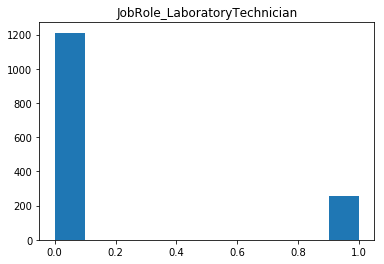

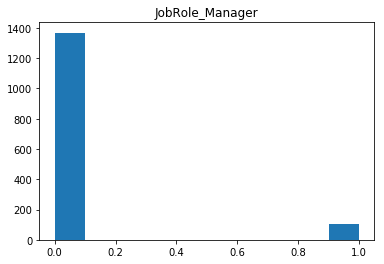

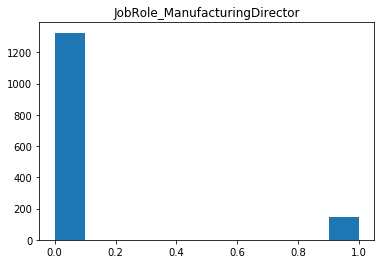

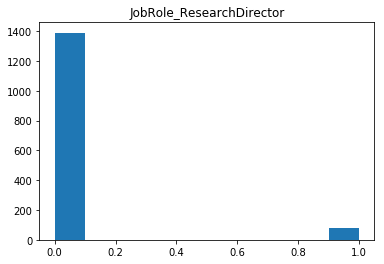

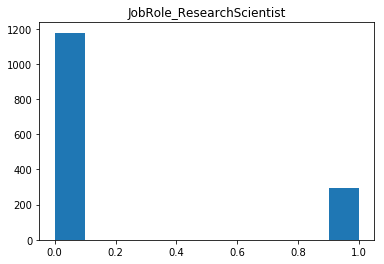

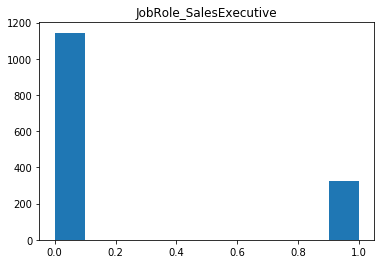

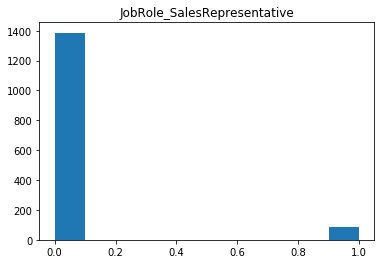

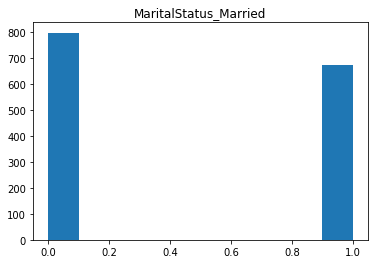

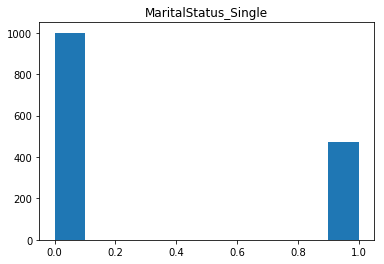

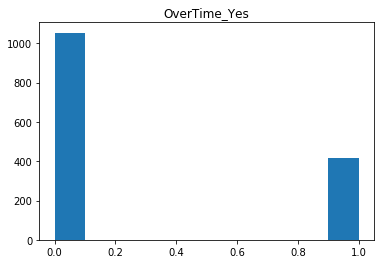

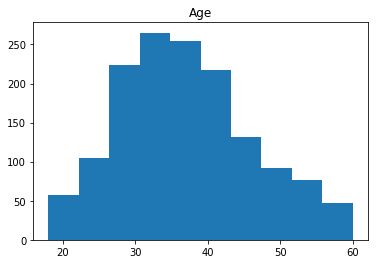

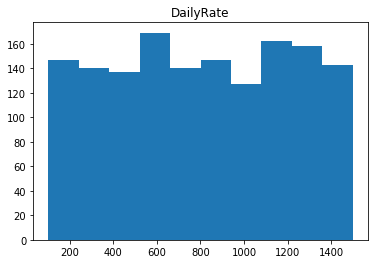

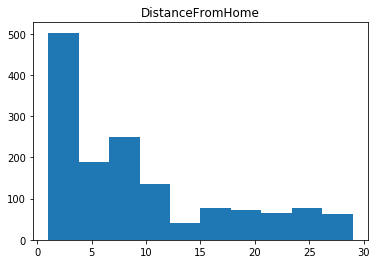

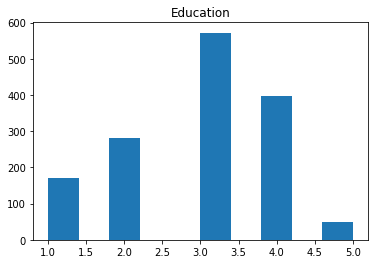

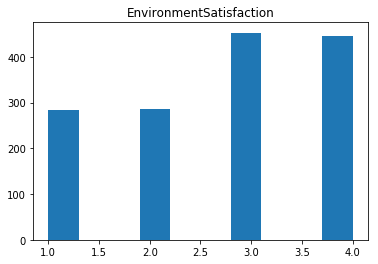

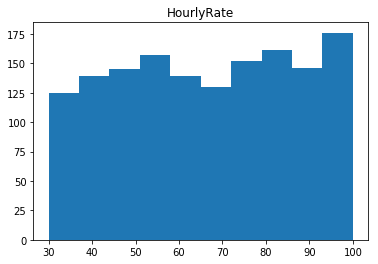

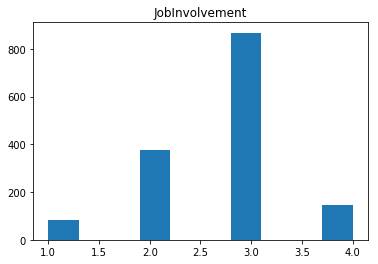

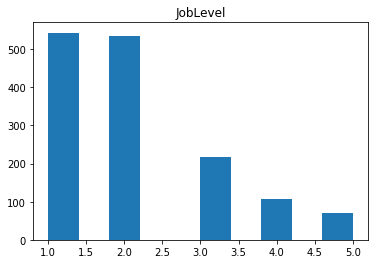

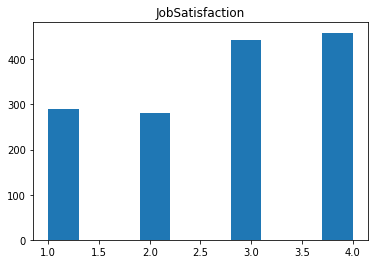

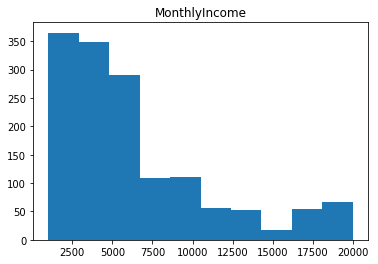

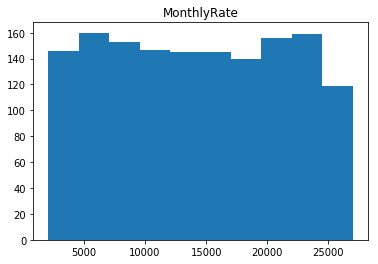

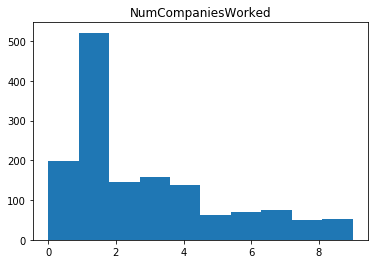

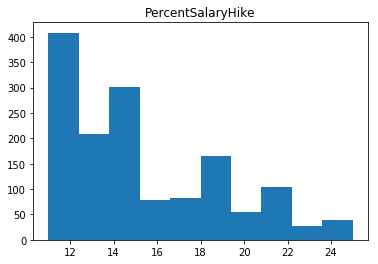

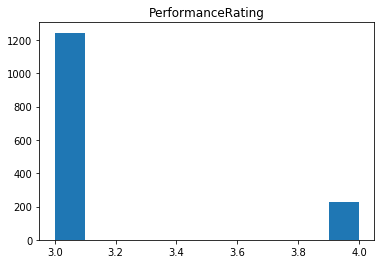

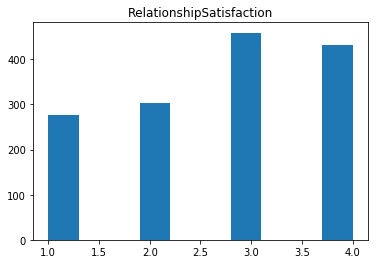

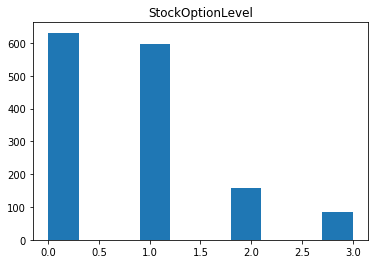

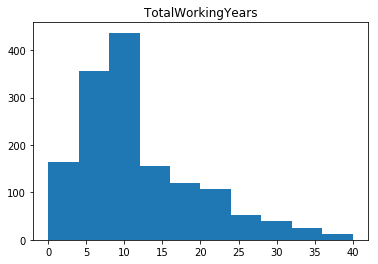

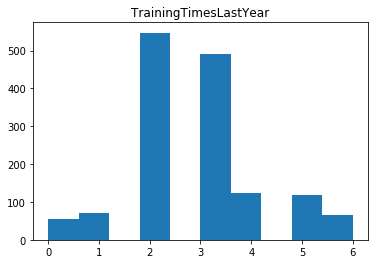

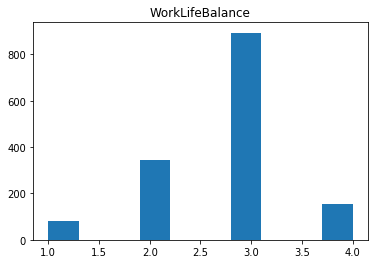

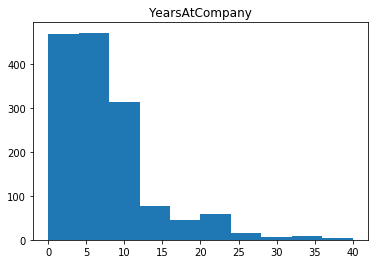

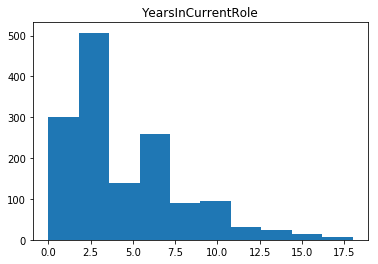

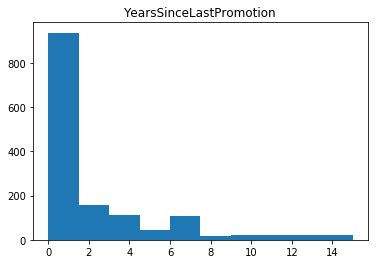

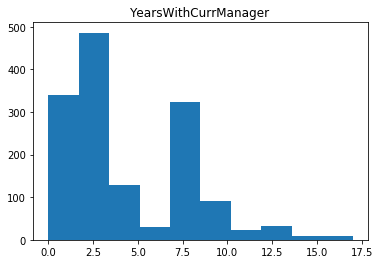

In [16]:
for i in data_final.columns:
    plt.hist(data_final[i])
    plt.title(i)
    plt.show()

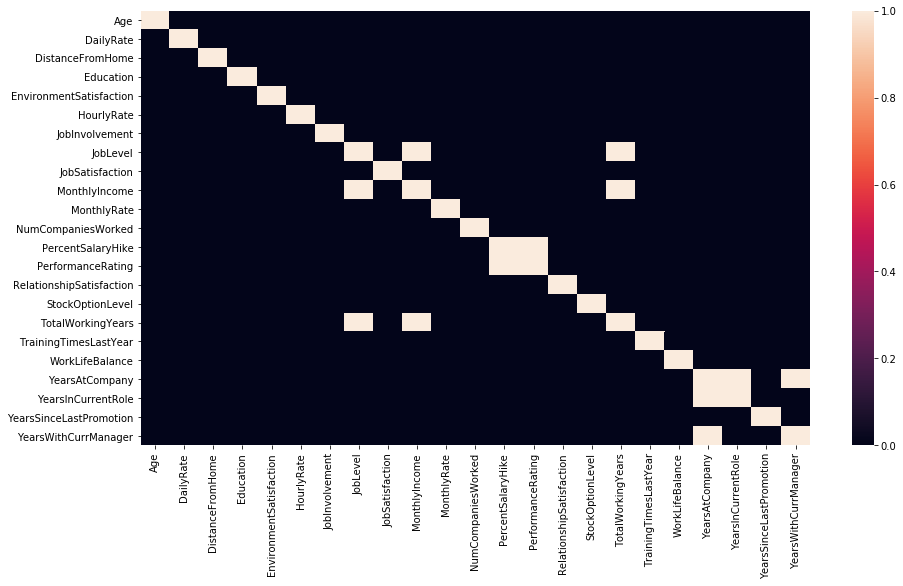

In [17]:
#let's check for correlations>=75% for only numerics
plt.figure(figsize=(15,8))
sns.heatmap(data_numeric.corr().abs().round(2)>=0.75)

In [18]:
#removing highly correlated vars
data_numeric.drop(["JobLevel","PerformanceRating","TotalWorkingYears","YearsInCurrentRole","YearsWithCurrManager"],
                  axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


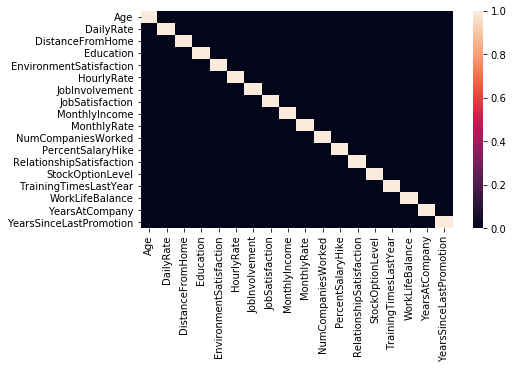

In [19]:
#plot again to confirm none is left with >0.75 correlation
plt.figure(figsize=(7,4))
sns.heatmap(data_numeric.corr().abs().round(2)>=0.75)
plt.show()

In [20]:
# update data final with removed correlations
data_final=data_dummy.join(data_numeric)

# Problem 3

In [21]:
X=data_final.drop("Attrition_Yes",axis=1)
Y=data_final.Attrition_Yes
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

### Logistic Regression and Classification and Regression Tree (Decision Tree)

In [22]:
#getting best parameters for Logit and DT
gridsearch1=GridSearchCV(LogisticRegression(class_weight="balanced",random_state=42),
                         param_grid={"penalty":["l1","l2"],"C":np.linspace(0.0001,50,20)},
                         scoring="roc_auc",cv=5,n_jobs=-1).fit(X,Y)
gridsearch2=GridSearchCV(DecisionTreeClassifier(class_weight="balanced", random_state=42),
                         param_grid={"max_depth":(5,15),"min_samples_leaf":(20,100)},
                         scoring="roc_auc",cv=5,n_jobs=-1).fit(X,Y)

In [23]:
best1=list(gridsearch1.best_params_.values())
best2=list(gridsearch2.best_params_.values())
print("Best Parameters of Logit:",best1)
print("Best Parameters of DT:",best2)

Best Parameters of Logit: [42.10527894736842, 'l2']
Best Parameters of DT: [15, 20]


In [24]:
#Fitting models
logit=LogisticRegression(C=best1[0],penalty=best1[1],class_weight="balanced",random_state=42).fit(x_train,y_train)
tree=DecisionTreeClassifier(class_weight="balanced",random_state=42, max_depth=best2[0],
                            min_samples_leaf=best2[1]).fit(x_train,y_train)

In [27]:
models = {"tree":tree, "logit":logit}
scores = {"ROC AUC":roc_auc_score,"Recall":recall_score,"accuracy":accuracy_score}

In [31]:
#Train
for score_name,score_function in scores.items():
    print("\n",score_name)
    for model_name,model in models.items():
        print(model_name,np.round(score_function(y_train,model.predict(x_train))*100,decimals=2))


 ROC AUC
tree 80.83
logit 78.99

 Recall
tree 81.48
logit 79.89

 accuracy
tree 80.4
logit 78.4


In [30]:
#Test
for score_name,score_function in scores.items():
    print("\n",score_name)
    for model_name,model in models.items():
        print(model_name,np.round(score_function(y_test,model.predict(x_test))*100,decimals=2))


 ROC AUC
tree 66.98
logit 71.15

 Recall
tree 58.33
logit 66.67

 accuracy
tree 73.37
logit 74.46


In [34]:
print("Logit Avereage cross validation roc_auc")
print(np.mean(cross_val_score(logit,X,Y,cv=5,scoring='roc_auc',n_jobs=-1)))
print("Tree Avereage cross validation roc_auc")
print(np.mean(cross_val_score(tree,X,Y,cv=5,scoring='roc_auc',n_jobs=-1)))

Logit Avereage cross validation roc_auc
0.8249281378269033
Tree Avereage cross validation roc_auc
0.70190977948844


# Problem 4

Logit is selected, as it less biased (more accurate) and have less variance (less overfitting). In average, it wins tree for all metrics on test.

# Problem 5

In [36]:
# to select features of Logit
# use statsmodels to get p-values
# select only those with significant p-values
# and plot
formula="Attrition_Yes~"+"+".join(X.columns)
logit_new=Logit.from_formula(formula=formula,data=data_final).fit()
marg_eff=pd.read_html(logit_new.get_margeff().summary().tables[1].as_html(),header=0)[0]
sig_marg_eff=marg_eff[marg_eff["P>|z|"]<0.05]

         Current function value: 0.302122
         Iterations: 35


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


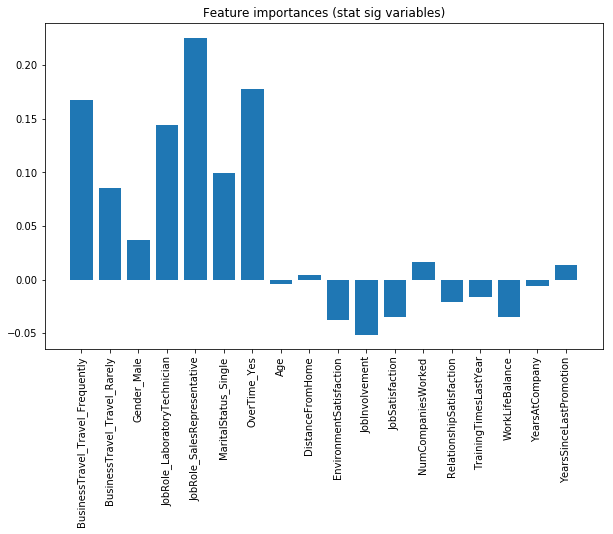

In [40]:
plt.figure(figsize=(10,6))
plt.bar(sig_marg_eff["Unnamed: 0"],sig_marg_eff["dy/dx"])
plt.xticks(rotation=90)
plt.title("Feature importances (stat sig variables)")
plt.show()